In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
# !pip install pyreadstat

In [2]:
df = pd.read_spss('../data/CCAM SPSS Data 2008-2018.sav')

In [3]:
geo = pd.read_csv('../data/YCOM6.0_2021_Data_.csv', encoding='latin-1')

In [4]:
df.shape

(22416, 54)

In [5]:
df.happening.value_counts()

Yes           14915
Don't know     3818
No             3612
Refused          71
Name: happening, dtype: int64

In [6]:
df['target'] = [int(val == 'Yes') for val in df.happening]

In [7]:
df.columns[26:39]

Index(['generation', 'educ', 'educ_category', 'income', 'income_category',
       'race', 'ideology', 'party', 'party_w_leaners', 'party_x_ideo',
       'registered_voter', 'region9', 'region4'],
      dtype='object')

In [8]:
df.isnull().sum()[13:26]/22416

harm_dev_countries     0.000000
harm_future_gen        0.000000
harm_plants_animals    0.059333
when_harm_US           0.000000
reg_CO2_pollutant      0.045057
reg_utilities          0.224215
fund_research          0.000000
reg_coal_emissions     0.405871
discuss_GW             0.000000
hear_GW_media          0.609252
gender                 0.000000
age                    0.000000
age_category           0.000000
dtype: float64

#### Review `harm_dev_countries`

In [9]:
list(df.harm_dev_countries.unique())

['A great deal',
 'Only a little',
 'Not at all',
 'A moderate amount',
 "Don't know",
 'Refused']

In [10]:
df.harm_dev_countries.value_counts(normalize = True)

A great deal         0.326240
A moderate amount    0.244334
Not at all           0.147573
Only a little        0.146547
Don't know           0.129327
Refused              0.005978
Name: harm_dev_countries, dtype: float64

In [11]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [12]:
df.harm_dev_countries = df.harm_dev_countries.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

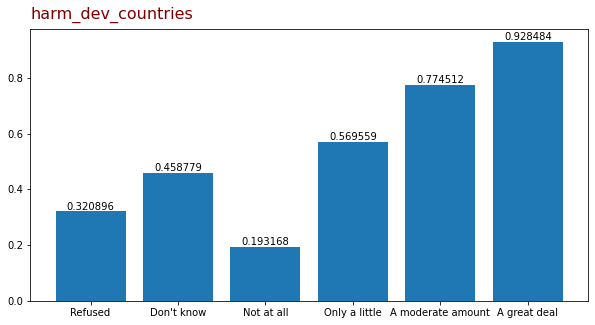

In [13]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('harm_dev_countries').mean().index,
        height = df.groupby('harm_dev_countries').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals);
ax.set_title("harm_dev_countries", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### Review `harm_future_gen`

In [14]:
list(df.harm_future_gen.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused']

In [15]:
df.harm_future_gen.value_counts(normalize = True)

A great deal         0.464311
A moderate amount    0.192630
Don't know           0.119022
Not at all           0.116301
Only a little        0.102115
Refused              0.005621
Name: harm_future_gen, dtype: float64

In [16]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [17]:
df.harm_future_gen = df.harm_future_gen.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

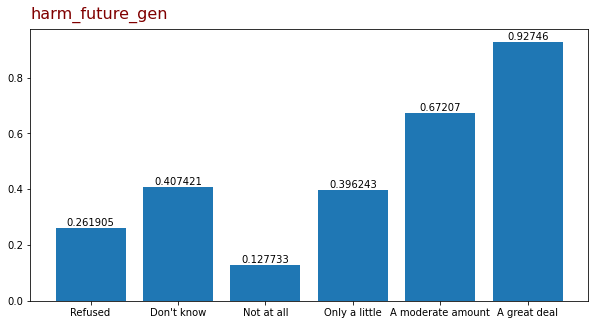

In [18]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('harm_future_gen').mean().index,
        height = df.groupby('harm_future_gen').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals);
ax.set_title("harm_future_gen", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### Review `harm_plants_animals`

In [19]:
list(df.harm_plants_animals.unique())

['A great deal',
 'A moderate amount',
 'Not at all',
 "Don't know",
 'Only a little',
 'Refused',
 nan]

In [20]:
df.harm_plants_animals.isnull().sum() / df.shape[0]

0.05933261955745896

In [21]:
df.harm_plants_animals.value_counts(normalize = True)

A great deal         0.453381
A moderate amount    0.200512
Not at all           0.117139
Only a little        0.112539
Don't know           0.110073
Refused              0.006355
Name: harm_plants_animals, dtype: float64

In [22]:
ordinals = ['Refused', 'Don\'t know', 'Not at all', 'Only a little', 'A moderate amount', 'A great deal']

In [23]:
df.harm_plants_animals = df.harm_plants_animals.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

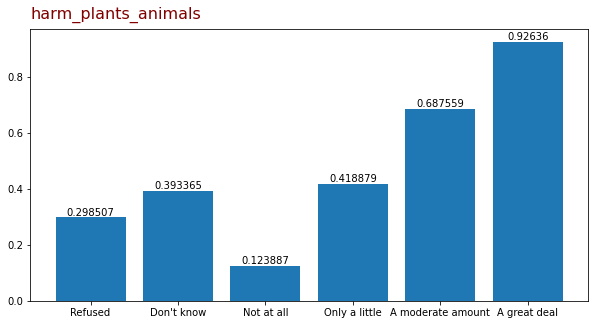

In [24]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('harm_plants_animals').mean().index,
        height = df.groupby('harm_plants_animals').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals);
ax.set_title("harm_plants_animals", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### Review `when_harm_US`

In [25]:
list(df.when_harm_US.unique())

['In 10 years',
 'In 50 years',
 'Never',
 'In 25 years',
 'In 100 years',
 'They are being harmed now',
 'Refused']

In [26]:
df.when_harm_US.value_counts(normalize = True)

They are being harmed now    0.343995
Never                        0.172823
In 25 years                  0.128346
In 100 years                 0.119602
In 50 years                  0.116569
In 10 years                  0.109431
Refused                      0.009234
Name: when_harm_US, dtype: float64

In [27]:
ordinals = ['Refused', '', 'Never', 'In 100 years', 'In 50 years', 'In 25 years'
            , 'In 10 years','They are being harmed now']

In [28]:
df.when_harm_US = df.when_harm_US.replace(
                                {val: i for i,val in zip(range(-1,7),ordinals)})

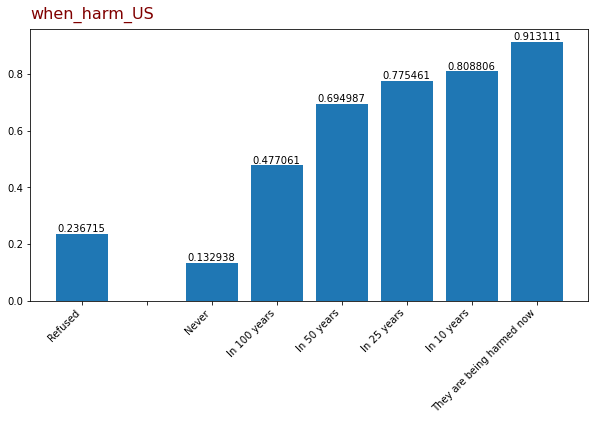

In [29]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('when_harm_US').mean().index,
        height = df.groupby('when_harm_US').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,7))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("when_harm_US", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### Review `reg_CO2_pollutant`

In [30]:
list(df.reg_CO2_pollutant.unique())

['Strongly support',
 'Somewhat support',
 'Somewhat oppose',
 'Strongly oppose',
 'Refused',
 nan]

In [31]:
df.reg_CO2_pollutant.isnull().sum()/df.shape[0]

0.045057102069950034

In [32]:
df.reg_CO2_pollutant.value_counts(normalize = True)

Somewhat support    0.448706
Strongly support    0.282584
Somewhat oppose     0.143184
Strongly oppose     0.100299
Refused             0.025227
Name: reg_CO2_pollutant, dtype: float64

In [33]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [34]:
df.reg_CO2_pollutant = df.reg_CO2_pollutant.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

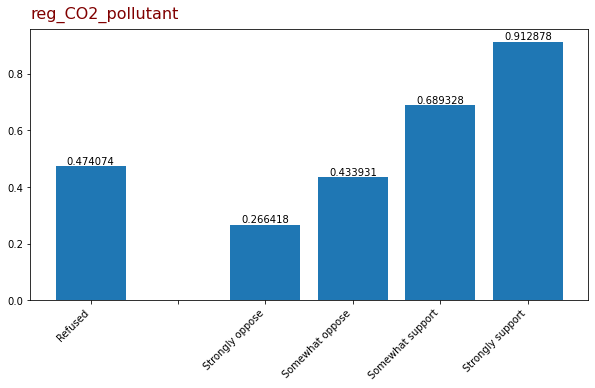

In [35]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('reg_CO2_pollutant').mean().index,
        height = df.groupby('reg_CO2_pollutant').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("reg_CO2_pollutant", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### Review `reg_utilities `

In [36]:
list(df.reg_utilities .unique())

['Strongly support',
 'Somewhat support',
 'Strongly oppose',
 'Somewhat oppose',
 'Refused',
 nan]

In [37]:
df.reg_utilities.isnull().sum() / df.shape[0]

0.22421484653818702

In [38]:
df.reg_utilities.value_counts(normalize = True)

Somewhat support    0.385624
Strongly support    0.232490
Somewhat oppose     0.200058
Strongly oppose     0.153882
Refused             0.027947
Name: reg_utilities, dtype: float64

In [39]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [40]:
df.reg_utilities = df.reg_utilities.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

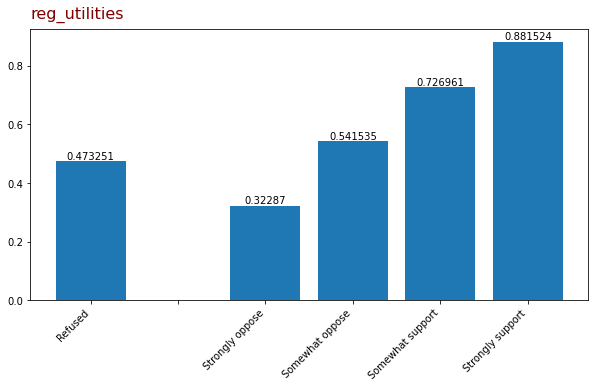

In [41]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('reg_utilities').mean().index,
        height = df.groupby('reg_utilities').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("reg_utilities", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### review `fund_research`

In [42]:
list(df.fund_research .unique())

['Strongly support',
 'Somewhat support',
 'Strongly oppose',
 'Somewhat oppose',
 'Refused']

In [43]:
df.fund_research.value_counts(normalize = True)

Somewhat support    0.410332
Strongly support    0.405782
Somewhat oppose     0.098546
Strongly oppose     0.061162
Refused             0.024179
Name: fund_research, dtype: float64

In [44]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [45]:
df.fund_research = df.fund_research.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

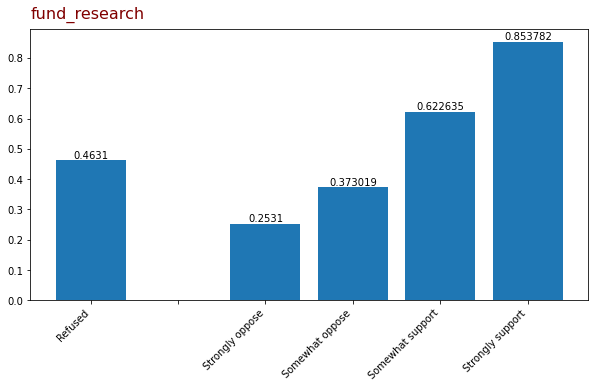

In [46]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('fund_research').mean().index,
        height = df.groupby('fund_research').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("fund_research", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### review `reg_coal_emissions`


In [47]:
list(df.reg_coal_emissions .unique())

[nan,
 'Strongly oppose',
 'Strongly support',
 'Somewhat support',
 'Refused',
 'Somewhat oppose']

In [48]:
df.reg_coal_emissions.isnull().sum() / df.shape[0]

0.405870806566738

In [49]:
df.reg_coal_emissions.value_counts(normalize = True)

Somewhat support    0.440006
Strongly support    0.238850
Somewhat oppose     0.176002
Strongly oppose     0.134104
Refused             0.011038
Name: reg_coal_emissions, dtype: float64

In [50]:
ordinals = ['Refused', '', 'Strongly oppose', 'Somewhat oppose', 'Somewhat support'
            ,'Strongly support']

In [51]:
df.reg_coal_emissions = df.reg_coal_emissions.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

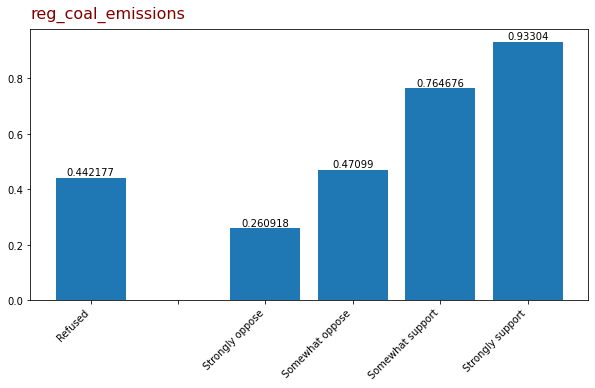

In [52]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('reg_coal_emissions').mean().index,
        height = df.groupby('reg_coal_emissions').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("reg_coal_emissions", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### review `discuss_GW`


In [53]:
list(df.discuss_GW.unique())

['Occasionally', 'Rarely', 'Never', 'Often', 'Refused']

In [54]:
df.discuss_GW.value_counts(normalize = True)

Rarely          0.367104
Occasionally    0.300143
Never           0.280559
Often           0.048671
Refused         0.003524
Name: discuss_GW, dtype: float64

In [55]:
ordinals = ['Refused', '', 'Never', 'Rarely', 'Occasionally', 'Often']

In [56]:
df.discuss_GW = df.discuss_GW.replace(
                                {val: i for i,val in zip(range(-1,5),ordinals)})

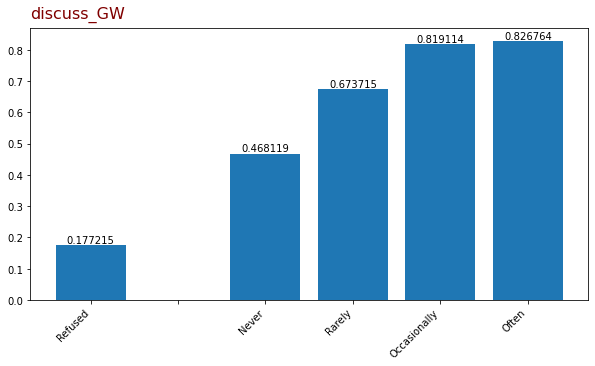

In [57]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('discuss_GW').mean().index,
        height = df.groupby('discuss_GW').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,5))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("discuss_GW", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### review `hear_GW_media`


In [58]:
list(df.hear_GW_media .unique())

[nan,
 'Once a year or less often',
 'Several times a year',
 'At least once a week',
 'Never',
 'At least once a month',
 'Not sure',
 'Refused']

In [59]:
df.hear_GW_media.isnull().sum() / df.shape[0]

0.6092523197715917

In [60]:
df.hear_GW_media.value_counts(normalize = True)

At least once a week         0.270693
Several times a year         0.255166
At least once a month        0.239868
Not sure                     0.107775
Once a year or less often    0.069186
Never                        0.050120
Refused                      0.007193
Name: hear_GW_media, dtype: float64

In [61]:
ordinals = ['Refused', 'Not sure', 'Never', 'Once a year or less often'
            , 'Several times a year', 'At least once a month'
            , 'At least once a week']

In [62]:
df.hear_GW_media = df.hear_GW_media.replace(
                                {val: i for i,val in zip(range(-1,6),ordinals)})

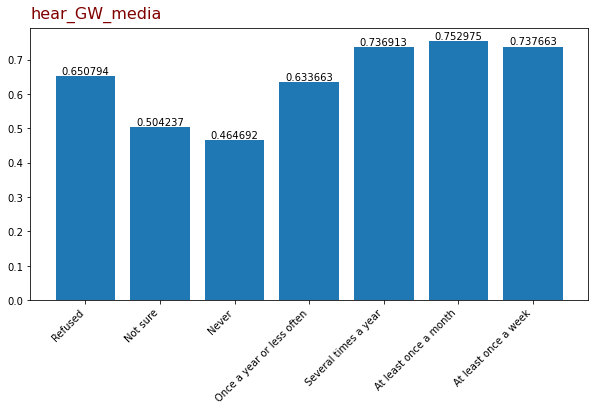

In [63]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('hear_GW_media').mean().index,
        height = df.groupby('hear_GW_media').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(-1,6))
ax.set_xticklabels(ordinals, rotation = 45, ha='right');
ax.set_title("hear_GW_media", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### review `gender`

In [64]:
list(df.gender .unique())

['Female', 'Male']

In [65]:
df.gender.value_counts(normalize = True)

Female    0.507316
Male      0.492684
Name: gender, dtype: float64

In [66]:
df.gender = [int(val == 'Female') for val in df.gender]

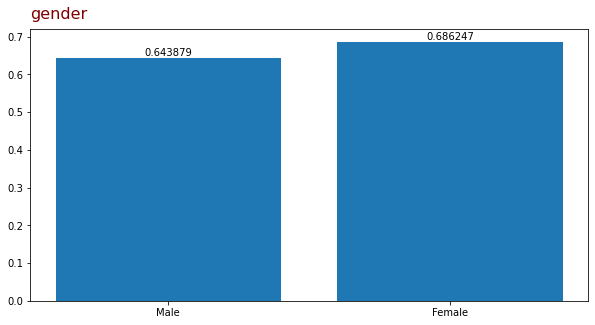

In [67]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

bar = ax.bar(df.groupby('gender').mean().index,
        height = df.groupby('gender').mean().target)
ax.bar_label(bar)
ax.set_xticks(range(0,2))
ax.set_xticklabels(['Male','Female']);
ax.set_title("gender", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

#### review `age`

In [68]:
df.age.describe()

count    22416.000000
mean        50.445530
std         16.818072
min         18.000000
25%         37.000000
50%         52.000000
75%         64.000000
max         97.000000
Name: age, dtype: float64

In [69]:
df.age.isnull().sum() / df.shape[0]

0.0

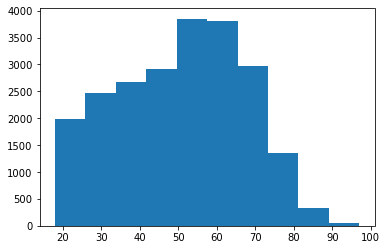

In [70]:
plt.hist(df.age);

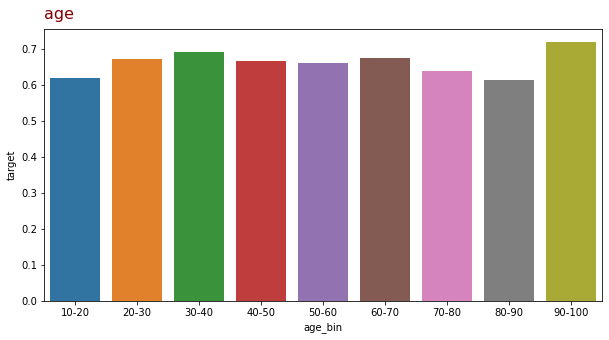

In [71]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

df['age_bin'] = pd.cut(df['age'], bins = range(10,101,10)
                       , labels=[f'{l}-{l+10}' for l in range(10,91,10)])\
                    .rename('age_bin')

sns.barplot(x = 'age_bin', y = 'target', data = df,
            estimator=np.mean, ci=None)
    
ax.set_title("age", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');


#### review `age_category`

In [72]:
list(df.age_category .unique())

['55+ years', '35-54 years', '18-34 years']

In [73]:
df.age_category.value_counts(normalize = True)

55+ years      0.449277
35-54 years    0.337304
18-34 years    0.213419
Name: age_category, dtype: float64

In [74]:
df = df.join(pd.get_dummies(df.age_category, prefix='age_category', 
                            drop_first=True))

df.columns[-2:]

Index(['age_category_35-54 years', 'age_category_55+ years'], dtype='object')

In [75]:
df.rename(columns = {df.columns[-2]:'age_category_35_54', 
                     df.columns[-1]: 'age_category_55_plus'}, 
          inplace=True)

df.columns[-2:]

Index(['age_category_35_54', 'age_category_55_plus'], dtype='object')

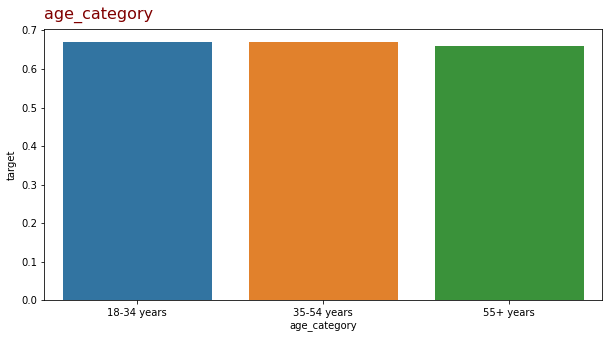

In [76]:
# graph
fig, ax = plt.subplots(1,1,figsize = (10,5))

sns.barplot(x = 'age_category', y = 'target', data = df,
            estimator=np.mean, ci=None)
    
ax.set_title("age_category", loc = 'left', pad = 10
             , fontsize = 16, color = 'maroon');

In [77]:
df.groupby('age_category').mean().target

age_category
18-34 years    0.670987
35-54 years    0.669356
55+ years      0.659716
Name: target, dtype: float64

### Drop high-null columns

In [78]:
df = df.drop(['reg_coal_emissions','hear_GW_media'], axis =1 )

## Modeling and Ordinal Impacts

In [79]:
df.isnull().sum()[13:24]

harm_dev_countries        0
harm_future_gen           0
harm_plants_animals    1330
when_harm_US              0
reg_CO2_pollutant      1010
reg_utilities          5026
fund_research             0
discuss_GW                0
gender                    0
age                       0
age_category              0
dtype: int64

In [80]:
# use only columns without nulls
df_option1 = df.iloc[:,13:23].drop(['harm_plants_animals', 'reg_CO2_pollutant',
                                    'reg_utilities'],
                                   axis = 1)\
                             .join(df[['age_category_35_54',
                                      'age_category_55_plus']])

### Option 1: Keep original ordinal values

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [82]:
# run knn on model
knn = KNeighborsClassifier(n_jobs=-1)

y = df.target
X = df_option1

scores = cross_val_score(knn, X, y,
                        cv=5,
                        n_jobs=-1)
print(f'{scores.mean():.2f} +/- {2*scores.std():.2f}')

0.80 +/- 0.03


### Option 2: drop "Refused to answer"

In [83]:
df_option2 = df_option1.copy().join(df.target)

In [84]:
# looks across each row and drops it if any value is -1 (our refused value)
df_option2 = df_option2.T.loc[:, ~(df_option2.T == -1).any()].T

In [85]:
# run knn on model
knn = KNeighborsClassifier(n_jobs=-1)

y = df_option2.target
X = df_option2.drop('target', axis=1)

scores = cross_val_score(knn, X, y,
                        cv=5,
                        n_jobs=-1)
print(f'{scores.mean():.2f} +/- {2*scores.std():.2f}')

0.81 +/- 0.03


### Option 3: drop "Refused to answer" and place "I don't know" in the middle

In [86]:
df_option3 = df_option2.copy()

In [93]:
# harm_dev_countries and harm_future_gen are the only features that
# have don't know that need moving

df_option3.iloc[:,:2] = df_option3.iloc[:,:2].applymap(lambda x: x + 1 if x > 2
                                                       else 3 if x == 0
                                                       else x)

In [95]:
# run knn on model
knn = KNeighborsClassifier(n_jobs=-1)

y = df_option2.target
X = df_option2.drop('target', axis=1)

scores = cross_val_score(knn, X, y,
                        cv=5,
                        n_jobs=-1)
print(f'{scores.mean():.2f} +/- {2*scores.std():.2f}')

0.81 +/- 0.03


### Option 4: keep "Refused to answer" and place "I don't know" in the middle

In [96]:
df_option4 = df_option1.copy()

In [98]:
df_option4.iloc[:,:2] = df_option4.iloc[:,:2].applymap(lambda x: x + 1 if x > 2
                                                       else 3 if x == 0
                                                       else x)

In [99]:
# run knn on model
knn = KNeighborsClassifier(n_jobs=-1)

y = df_option2.target
X = df_option2.drop('target', axis=1)

scores = cross_val_score(knn, X, y,
                        cv=5,
                        n_jobs=-1)
print(f'{scores.mean():.2f} +/- {2*scores.std():.2f}')

0.81 +/- 0.03
